In [16]:
''' Jordan: Replace this part with a trained model, 
and the rest of the code should work.
'''
# Train and save the word2vec model: 
import pandas as pd 
import psycopg2 
PGHOST="datafest201912.library.ucdavis.edu"
PGDATABASE="postgres"
PGPORT="49152"
PGUSER="anon"
PGPASSWORD="anon"

conn_string = ("host={} port={} dbname={} user={} password={}") \
        .format(PGHOST, PGPORT, PGDATABASE, PGUSER, PGPASSWORD)
conn=psycopg2.connect(conn_string)

import gensim
import string

sql_command = "select page_ark, string_agg(text, '  ') from rtesseract_words group by page_ark;"
frame1 = pd.read_sql(sql_command, conn)
texts = list(frame1['string_agg'])

preprocessed_texts = []
for t in texts:
    t = ''.join([c for c in t if c in string.ascii_letters or c in string.whitespace])
    t = t.lower()
    t = t.split()
    preprocessed_texts.append(t)    
model = gensim.models.Word2Vec(
            preprocessed_texts,
            size=200,
            window=15,
            min_count=5,
            workers=4)

import pickle
pickle.dump(model,open("model.sav", 'wb')) 

In [1]:
# Import libraries
import pandas as pd 
import psycopg2 
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import S4fcns as S4
import string
import webbrowser

## Visualization tools

Example usage on document 'd7pp4q-027':

1) Color a document based on confidence of the text:

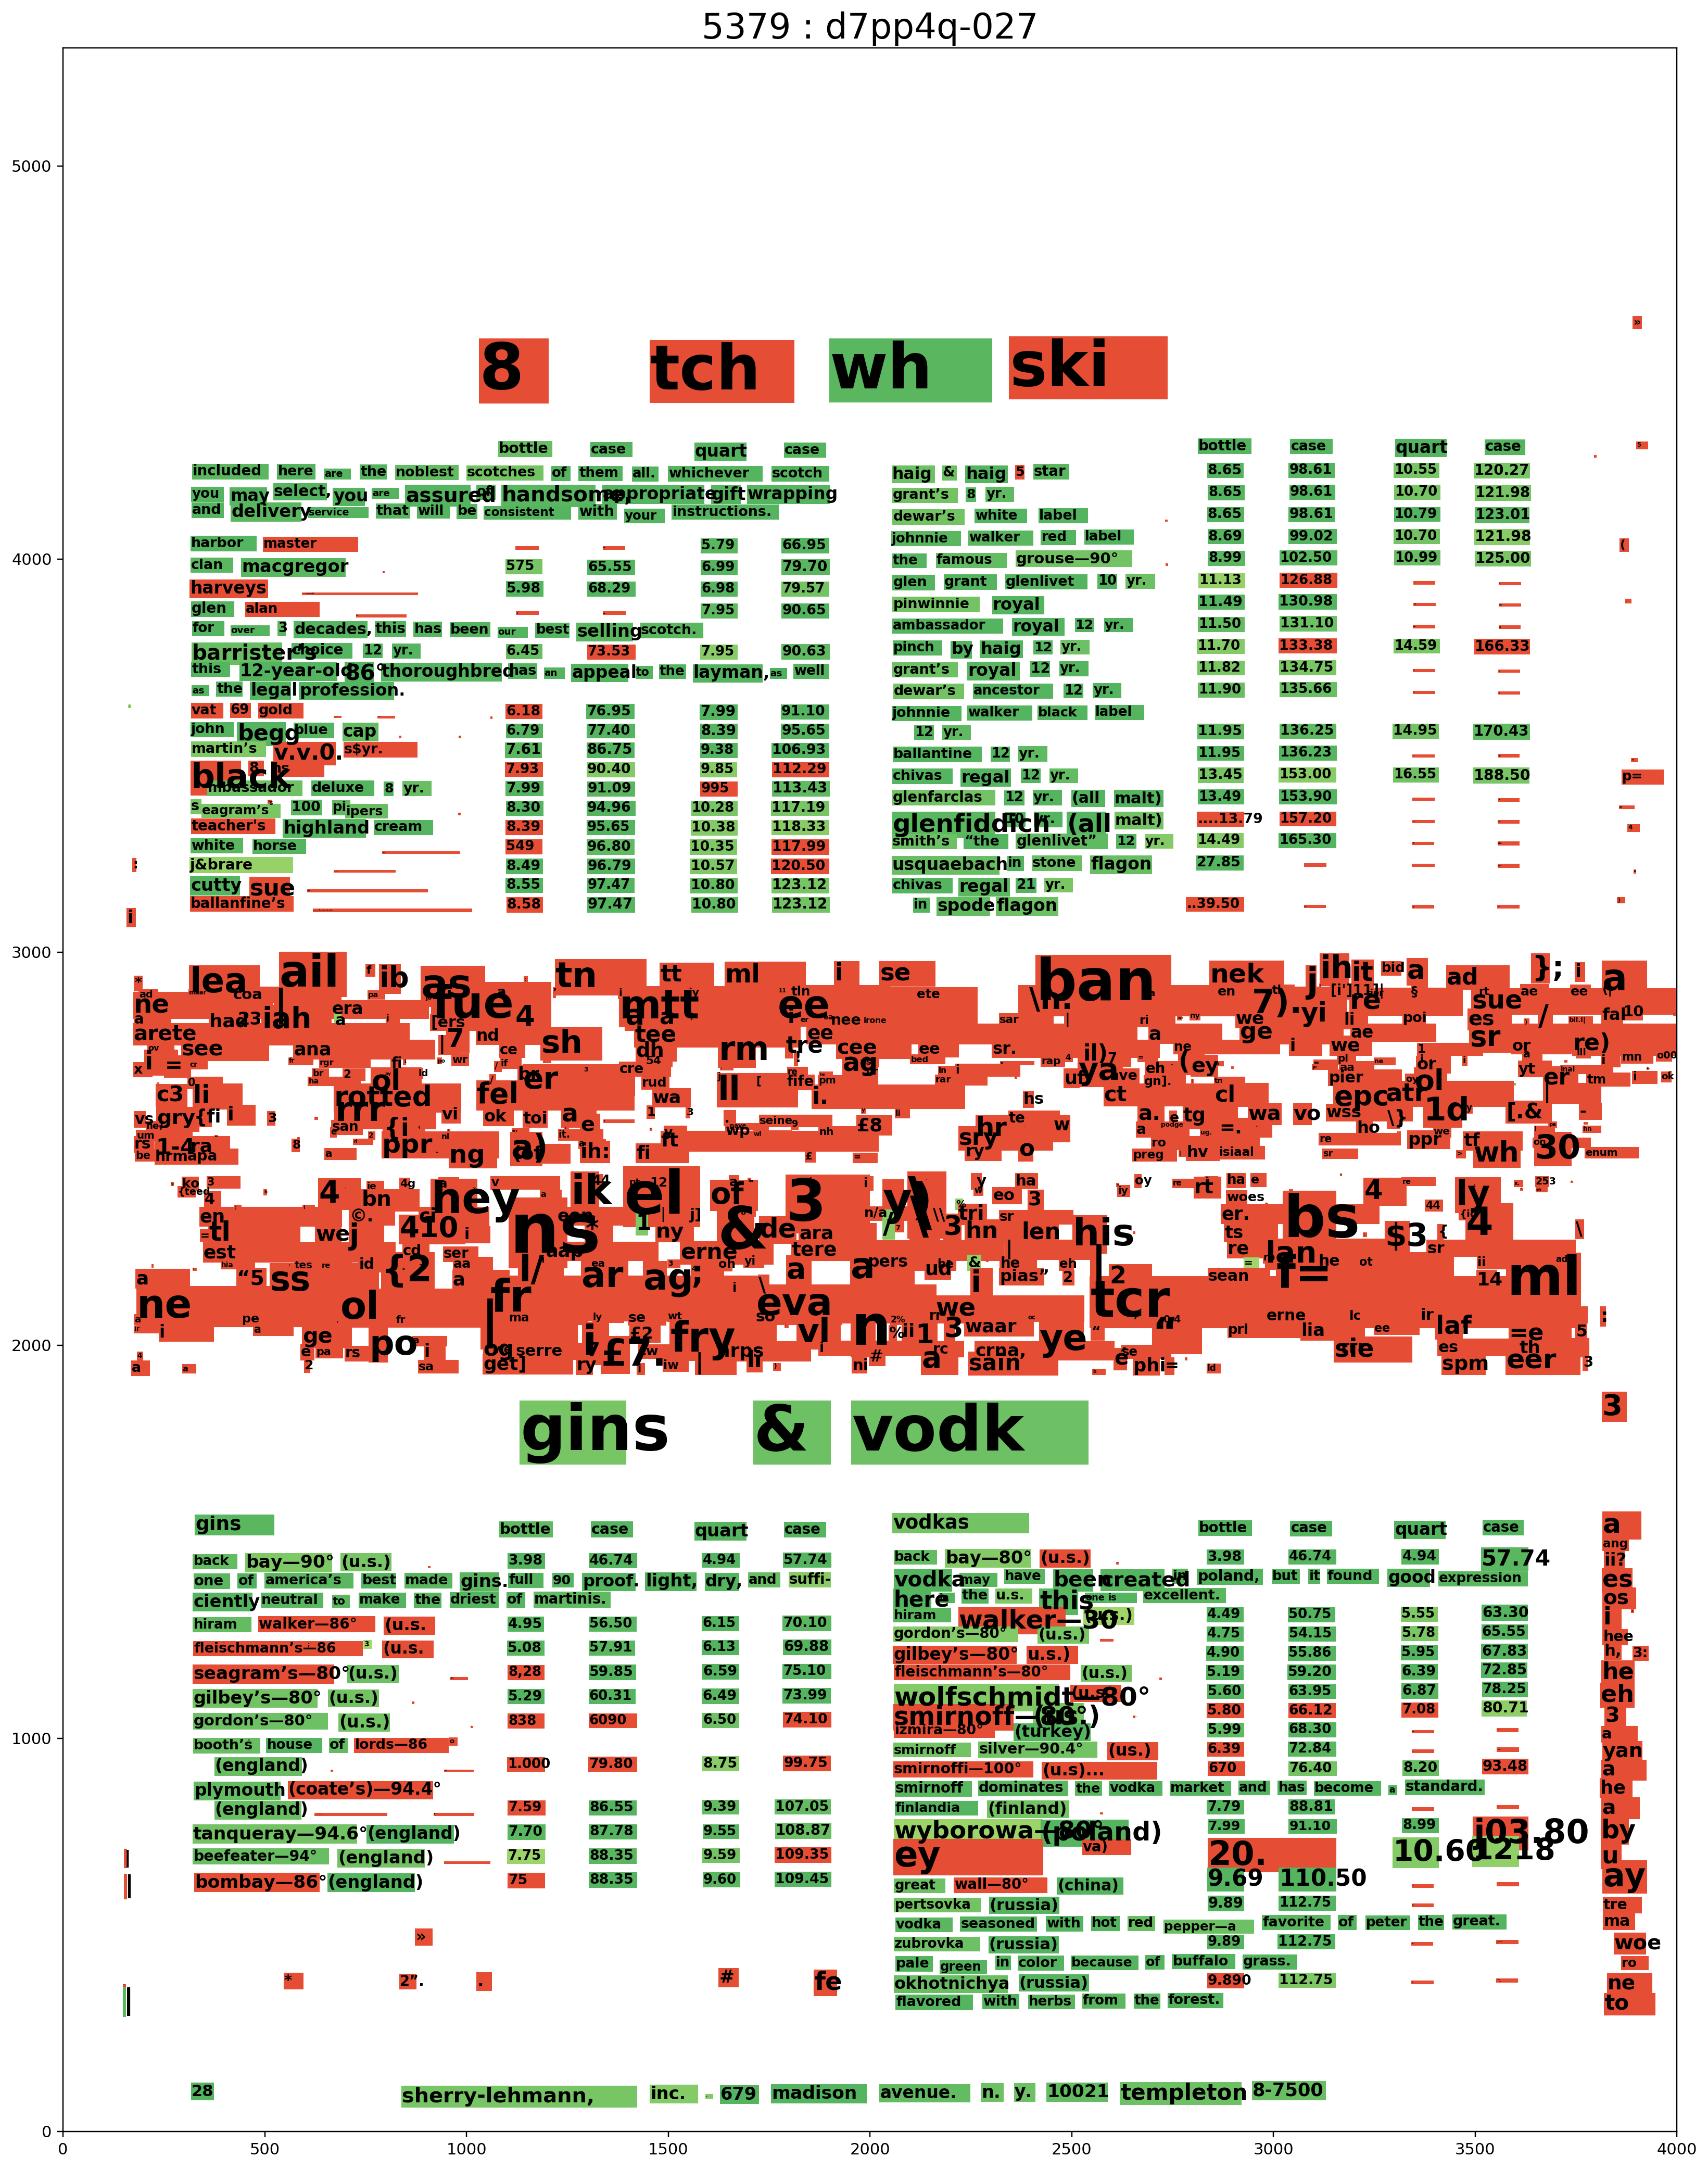

In [2]:
S4.colorDoc('d7pp4q-027', colorBy='text_confidence')

2) Run the cell below to open the orignal document:

In [4]:
link = S4.getDocLink(document = 'd7pp4q-027')
webbrowser.open(link)

True

## Model testing:

To test the word embedding model, we'll use document 'd7jg65-006'. 
* We'll color code the document according to its similary to *champagne*.
* Next, we'll color code the document according to its similary to *wine*.

To open the original document run the cell below:

In [2]:
documentName = 'd7jg65-006'
link= S4.getDocLink(documentName)
print(link)
# webbrowser.open(link)

https://digital.ucdavis.edu/collection/sherry-lehmann/D-202/d7jg65/media/images/d7jg65-006.jpg


Once we have a trained gensim word2vec model we: 

1) Preprocessed the document to extract the words (in numerical order) from the document. 

1) Iteratively calculated the similarity score for each word of the preprocessed document to the target word (*orderedScores*).

2) Scaled the similiarity scores in a range of 0 to 100, which served as indecies to color the document (*colorIdxs*). 

3) Colored the document according to it similarity to the target word. 

This is all wrapped up in the colorDoc function in the S4fcns package: 
Example usage is below:


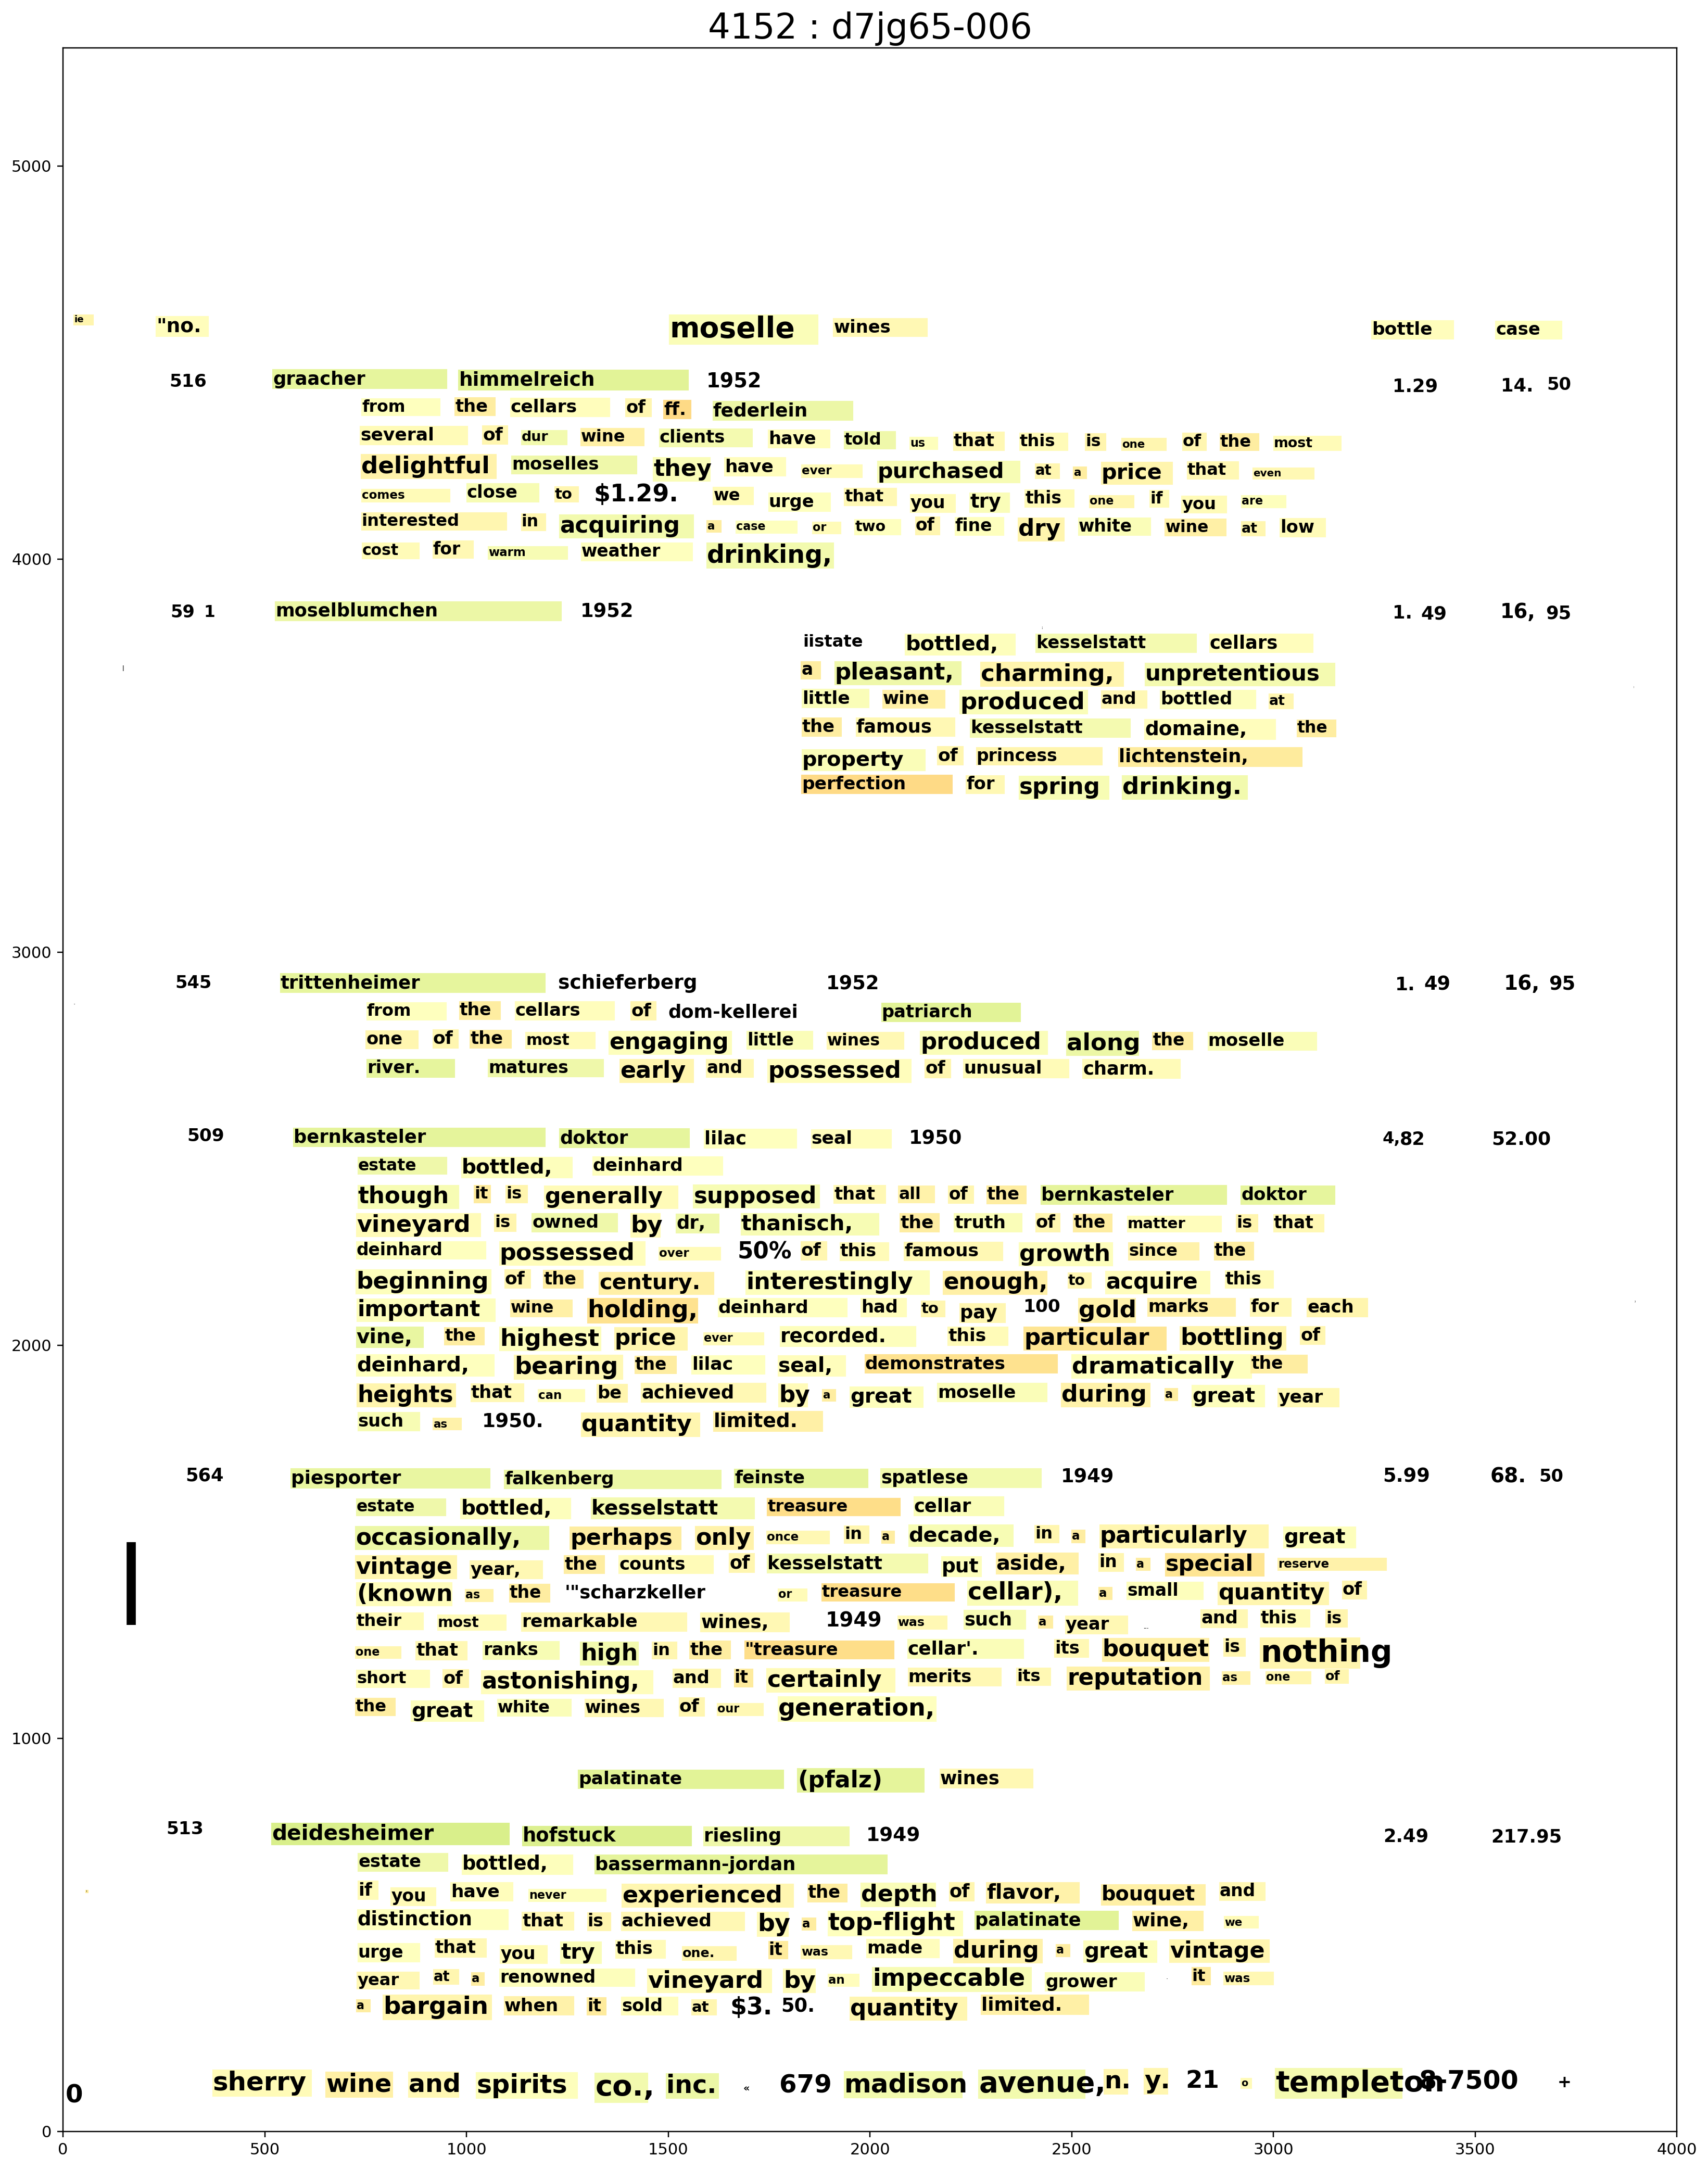

In [3]:
import pickle
model = pickle.load(open("model.sav",'rb')) 
S4.colorDoc(documentName, colorBy = 'wordSimilarity', \
            targetWord = 'champagne', model = model)

The more green the document, the more similar it is to the target word (i.e. champagne). 
Numbers and some words were not in the vocabulary of the gensim model, and so they were not colored in.

We next, colored in the document in a similar way below for the target word wine:

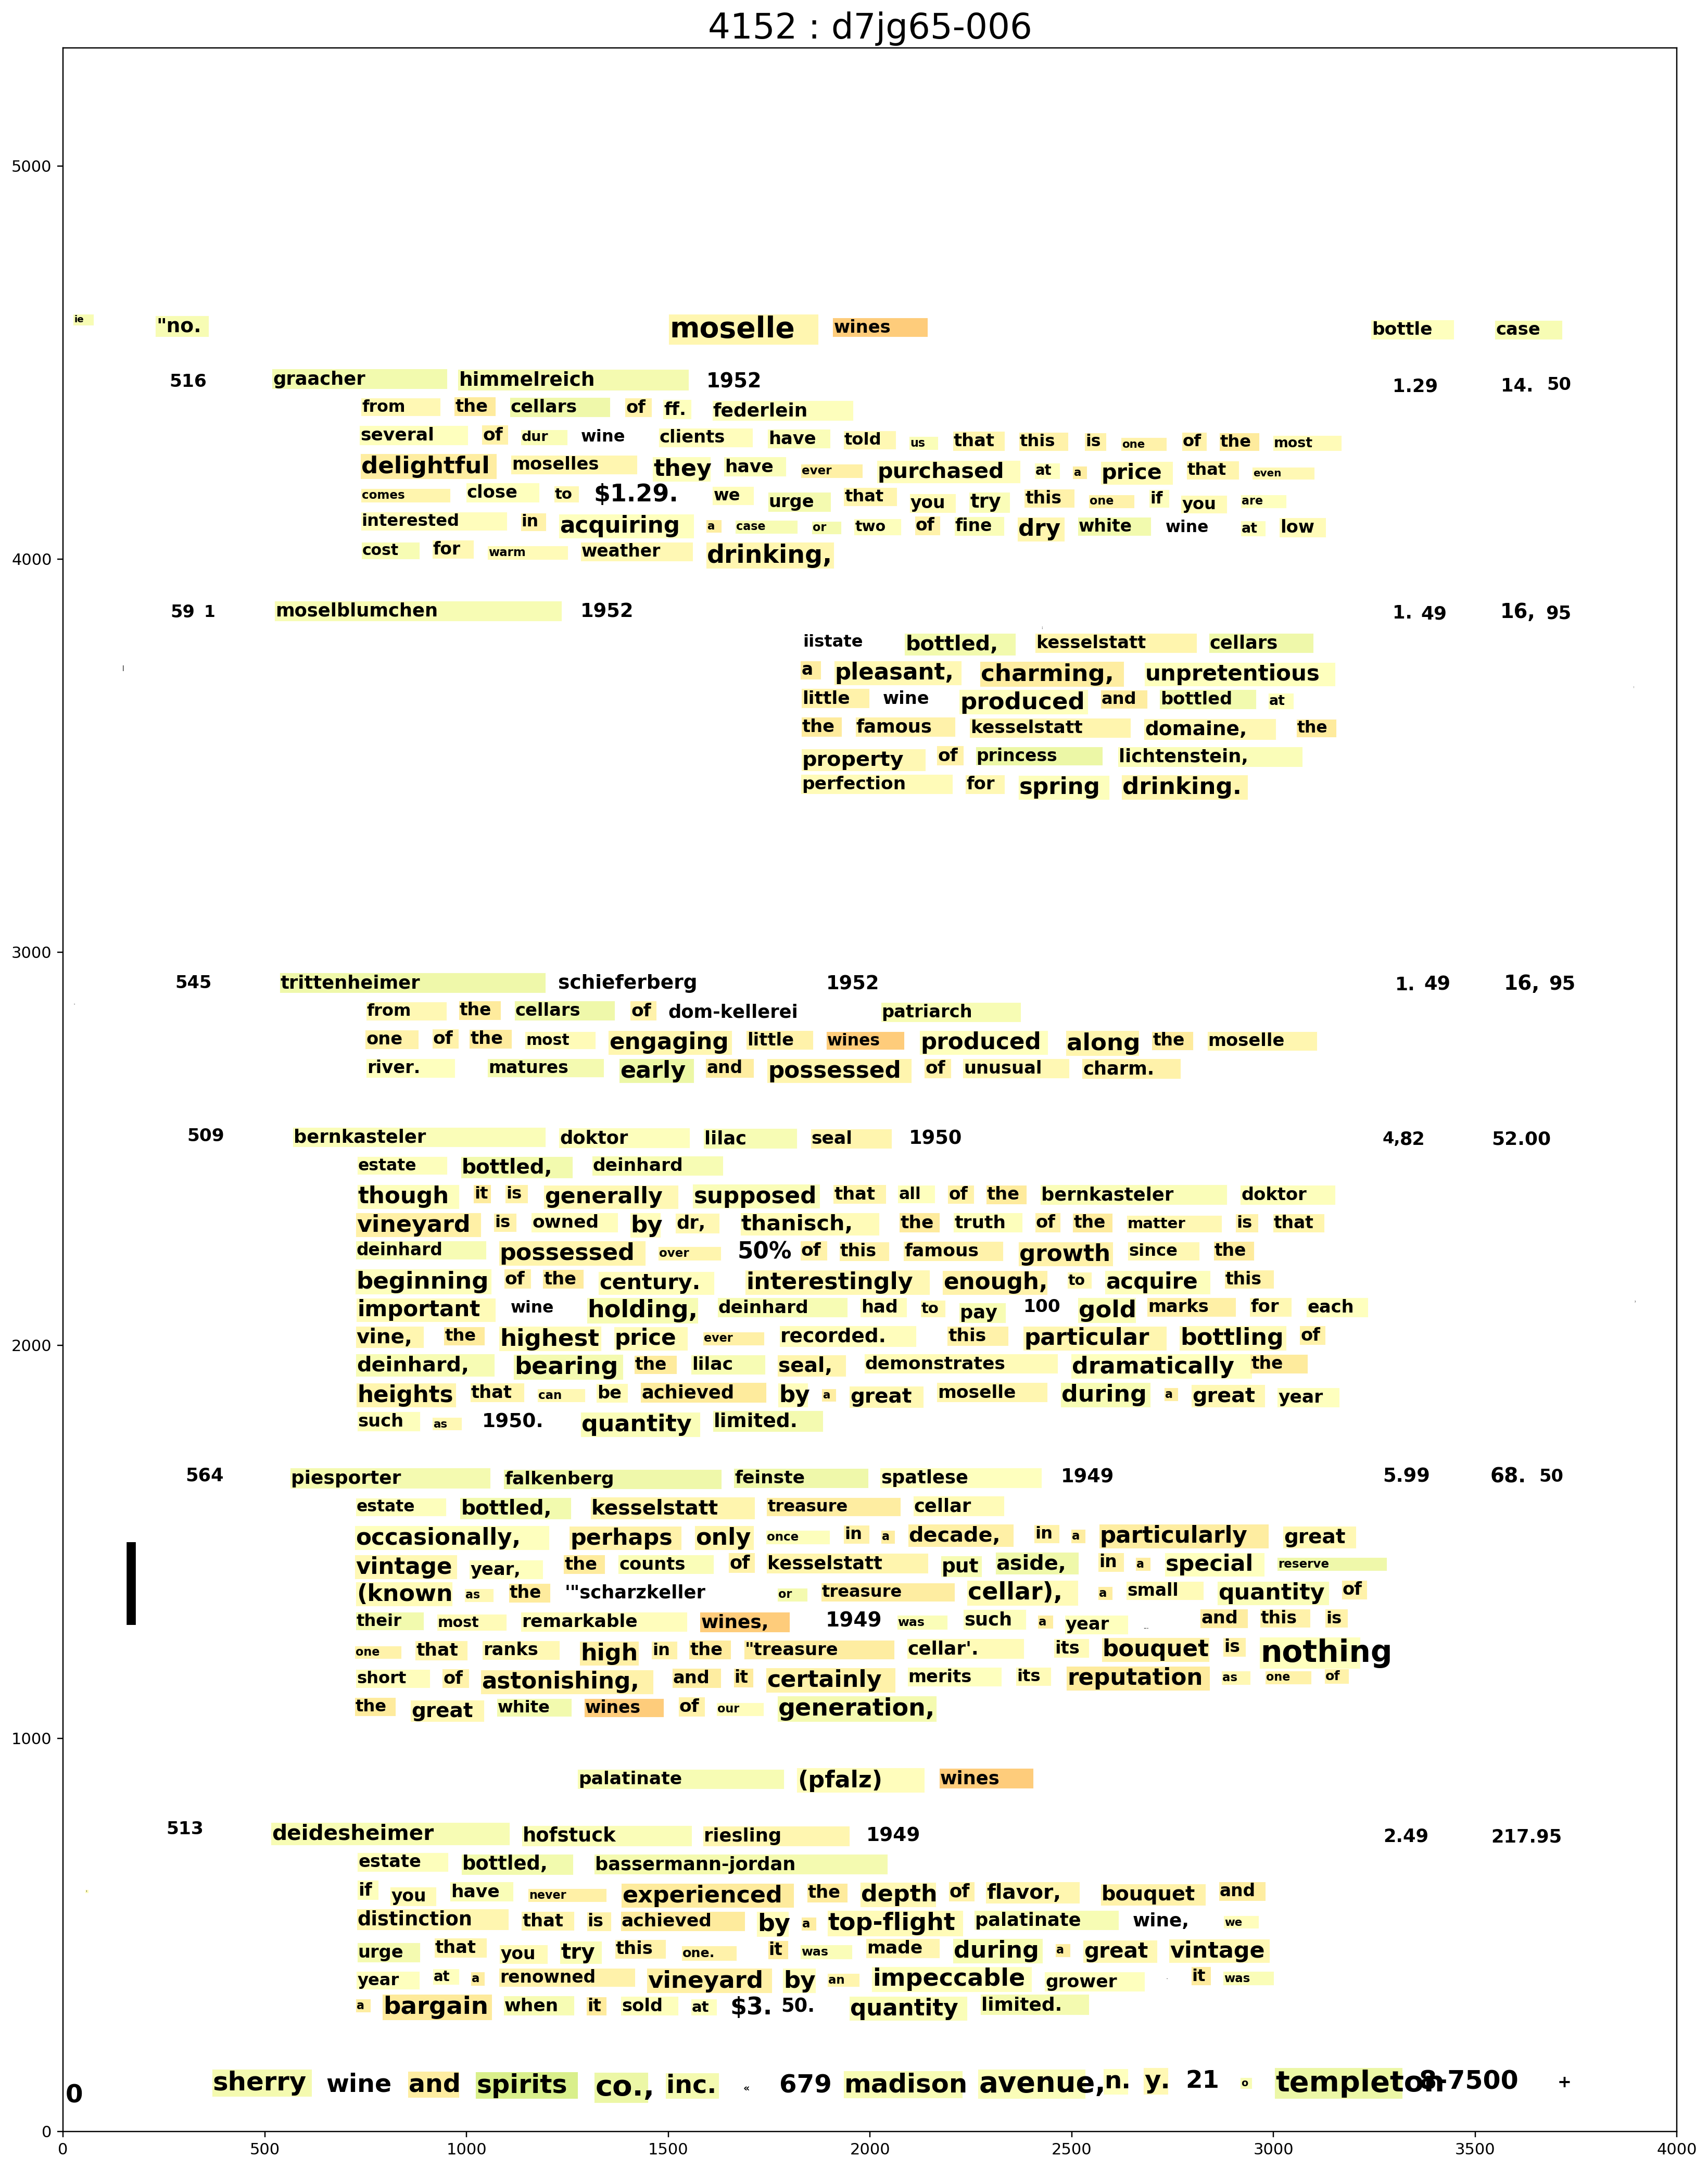

In [4]:
S4.colorDoc(documentName, colorBy = 'wordSimilarity', \
            targetWord = 'wine', model = model)